<a href="https://colab.research.google.com/github/talgalper/Honours-2021/blob/main/basic_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pandas as pd

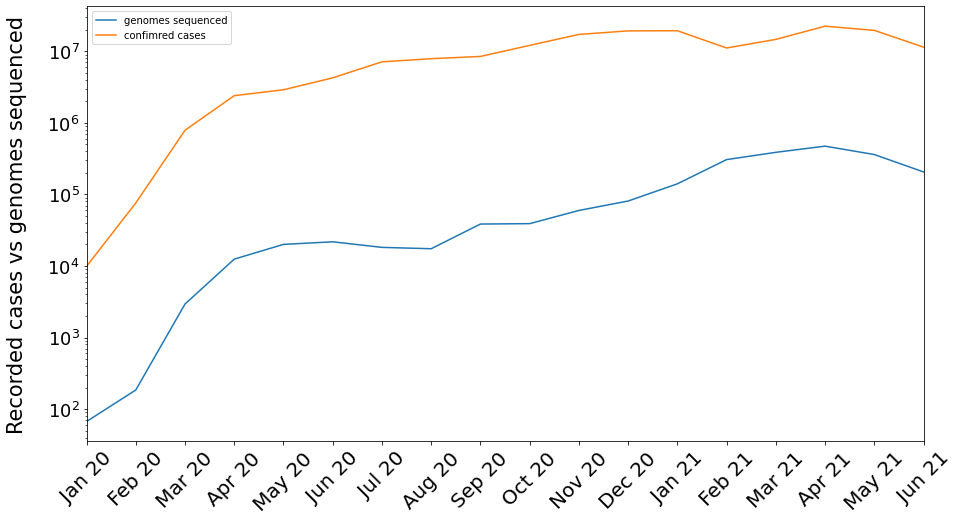

In [24]:
# sequence submissions
x1 = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
y1 = np.array([67,185,2944,12482,20058,21797,18215,17443,38602,39107,59771,80987,140851,307232,388230,473636,361614,206664,])

# confirmed cases
x2 = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
y2 = np.array([9896,76087,790499,2405681,2906074,4269652,7146907,7904244,8504365,12129873,17268936,19348070,19446155,11152296,14719299,22503021,19676316,11470758])

x_axis_labels = ['Jan 20','Feb 20','Mar 20','Apr 20','May 20','Jun 20','Jul 20','Aug 20','Sep 20','Oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','May 21','Jun 21']

#set figure size
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

#plot parameters
plt.xticks(x1, x_axis_labels, fontsize=20, rotation=45)
plt.plot(x1, y1, label='genomes sequenced')
plt.plot(x2, y2, label='confimred cases')

plt.yscale('log')
plt.yticks(fontsize=18)
plt.legend()
plt.xlim([0,17])
plt.ylabel('Recorded cases vs genomes sequenced',labelpad=20, fontsize=21)

plt.savefig('Recorded cases vs genomes sequenced', bbox_inches='tight')
plt.show()


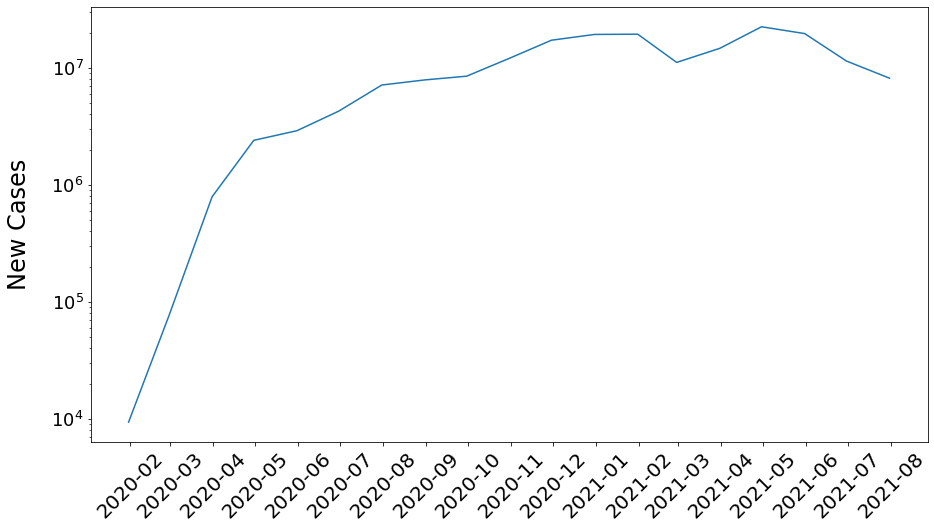

In [27]:
# monthly data from OWID 
data = pd.read_csv("/content/drive/MyDrive/Honours/owid-covid-data.csv")

data.date = pd.to_datetime(data.date)

data.location = data.location.astype('category')
data.continent = data.continent.astype('category')

subset_data = data[["continent", "location", "date", "new_cases"]]
subset_data = subset_data[subset_data.location == "World"]
subset_data = subset_data.dropna(subset=["new_cases"])
subset_data.new_cases = subset_data.new_cases.astype('int64')
subset_data.index = subset_data.date


sum_months = subset_data.groupby(pd.Grouper(freq='M')).sum()
sum_months = sum_months.reset_index()
sum_months

fig, ax = plt.subplots()

plt.yscale('log')
plt.xticks(rotation=45, fontsize=20)
plt.ylabel('New Cases',labelpad=20, fontsize=24)
plt.yticks(fontsize=18)
fig.set_size_inches(15, 8)
ax.plot(sum_months.date, sum_months.new_cases)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 

fig.savefig('Monthly_cases', bbox_inches='tight')


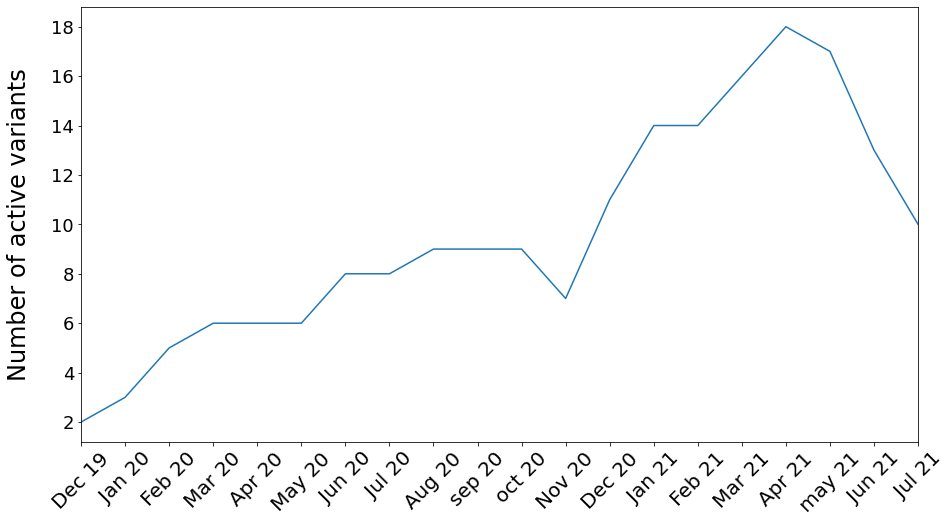

In [28]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
y = np.array([2,3,5,6,6,6,8,8,9,9,9,7,11,14,14,16,18,17,13,10,])

x_axis_labels = ['Dec 19','Jan 20','Feb 20','Mar 20','Apr 20','May 20','Jun 20','Jul 20','Aug 20','sep 20','oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','may 21','Jun 21','Jul 21']

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.xticks(x, x_axis_labels)
plt.plot(x, y)

plt.xlim([0,19])
plt.ylabel('Number of active variants',labelpad=20, fontsize=24)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=18)

plt.savefig('Number of active variants', bbox_inches='tight')
plt.show()